### Importing the major libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns

### Importing the data

In [2]:
df1=pd.read_excel("DS - Assignment Part 1 data set.xlsx" )
df1=df1.drop(columns=['Transaction date'],axis=1)
print(df1.shape)
df1.head()

(414, 8)


,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Transaction date column has been removed since it does not provide any useful information regarding the price of the house.

In [3]:
df1.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

### Checking for null values

In [4]:
df1.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df1.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


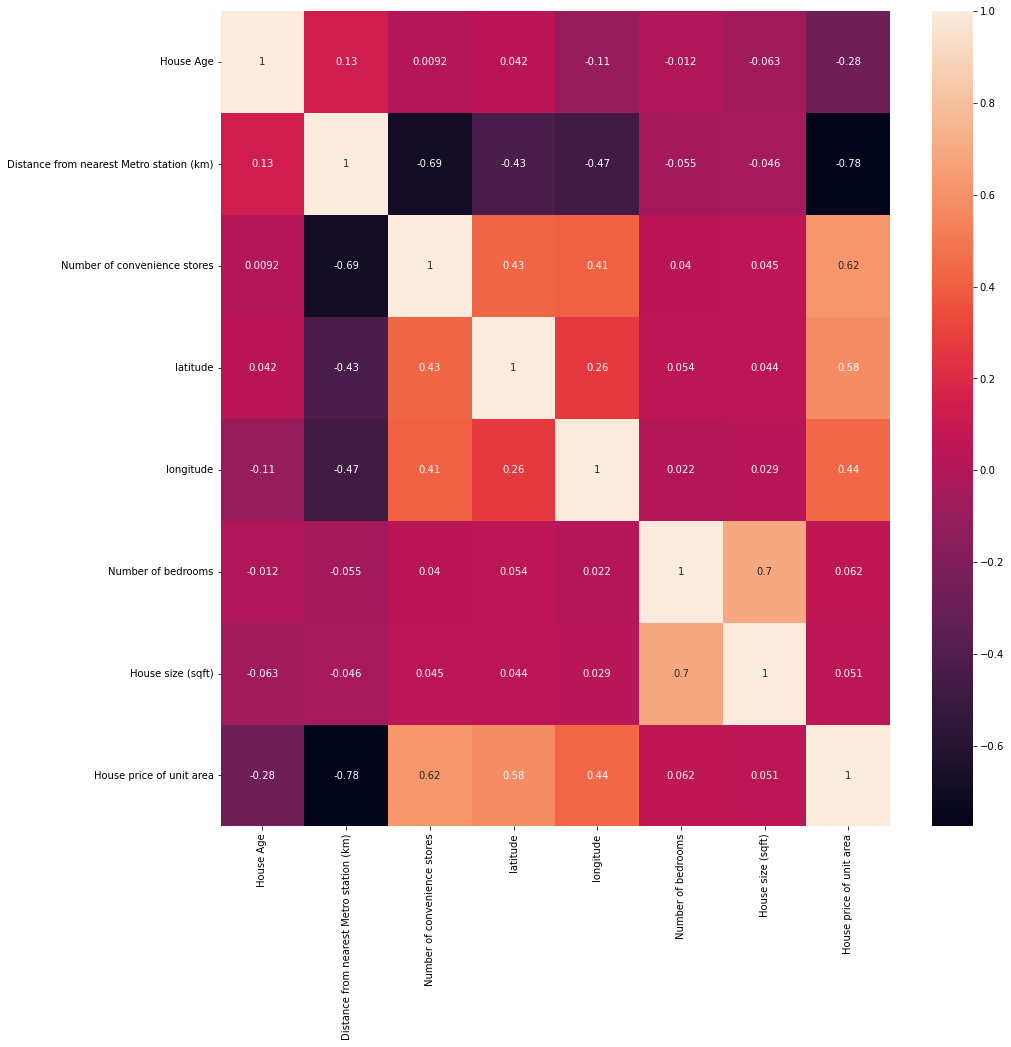

In [6]:
corr=df1.corr(method='spearman')
plt.figure(figsize=(15,15))
g=sns.heatmap(corr,annot=True)

### from the above correlation heatmap it can be concluded that the
### 1)House price is having positive correlation with number of convenience stores, longitue and latitude. 
### 2)House price is having negative correlation with distance from nearest metro station and House age
### 3)House price is having neutral correlation with number of bedrooms,house size.

### Importing the major regression algorithms for tarining the models and to make predictions

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


### Features to evaluate the House price prediction are stored in the variable X and the Target Price of House is stored in the variable y

In [8]:
data=df1.values
X,y=data[:,:-1],data[:,-1]

## Procedure for selecting the final model for House price prediction:
### Without removing the outliers:
As the dataset is very small  we will evaluate the various regression models using Repeated kfold cross validation method.
Here we will use mean absolute error metric for the comparion between various regression models.

### Perform the above step again by removing the outliers:
Now compare the models of with outliers and the models without outliers and select the best model.
Based on the best model we will perform hyper parameter tuning and then finalize the model for House price prediction.



### LinearRegression Model

In [9]:
#define model
model=LinearRegression()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.334 (1.063)


### ElasticNet Regressor Model

In [10]:
#define model
model=ElasticNet(alpha=1,l1_ratio=0.5)
DecisionTree_model=DecisionTreeRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.583 (1.027)


### DecisionTreeRegressor Model

In [11]:
#define model
model=DecisionTreeRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.227 (1.212)


### RandomForestRegressor Model

In [12]:
#define model
model=RandomForestRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 4.969 (0.739)


### AdaBoostRegressor Model

In [13]:
#define model
model=AdaBoostRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.851 (0.796)


### GradientBoostingRegressor Model

In [14]:
#define model
model=GradientBoostingRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.010 (0.816)


### Support vector regressor Model

In [15]:
#define model
model=SVR()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.549 (1.152)


### CatBoostRegressor Model

In [16]:
#define model
model=CatBoostRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.125 (0.924)


### XGBRegressor Model

In [17]:
#define model
model=XGBRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.348 (0.751)


### Removing the outliers from the dataset i.e. including the target variable because this is a typical case of a sampling problem in which we have to remove the outliers from the target variable aswell.
### Standardizing  both the input and output variables which is important for the models like Support vetor machines, linear models like linear, lasso, ridge and ElasticNet

In [18]:
df=df1.copy()
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
discreate_features=[feature for feature in df.columns if len(df[feature].unique())<25]
contineous_features=[feature for feature in numerical_features if feature not in discreate_features]
categorical_features=[feature for feature in df.columns if feature not in numerical_features]
print('Numerical_features count: {}'.format(len(numerical_features)))
print('Discreate_features count: {}'.format(len(discreate_features)))
print('Contineous_features count: {}'.format(len(contineous_features)))
print('Categorical_features count: {}'.format(len(categorical_features)))


Numerical_features count: 8
Discreate_features count: 2
Contineous_features count: 6
Categorical_features count: 0


### Box plot to detect the outlier in the dataset

C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\si

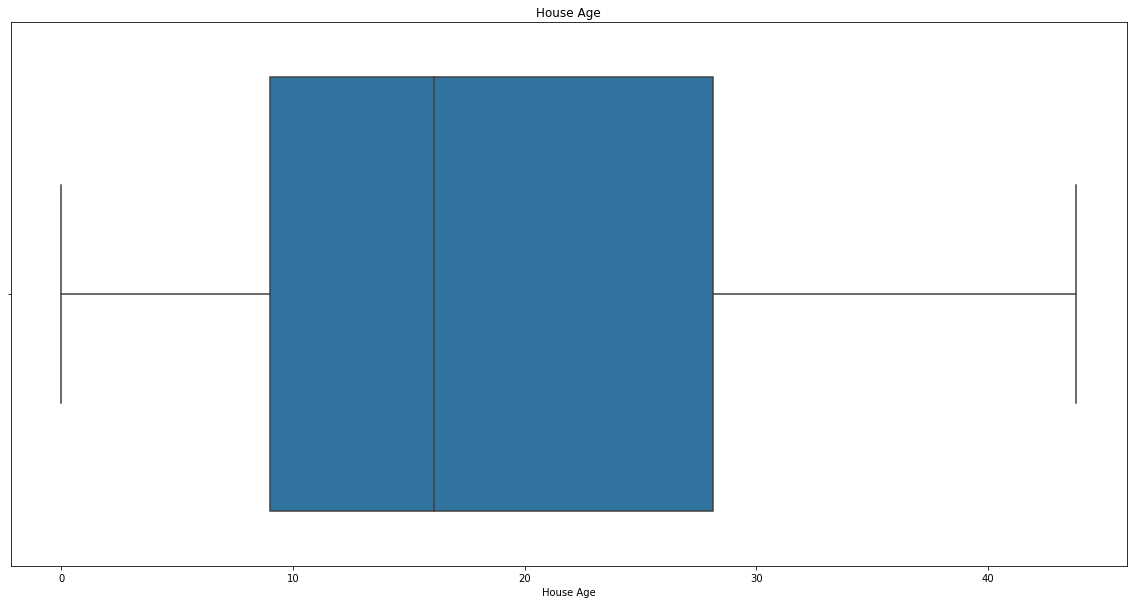

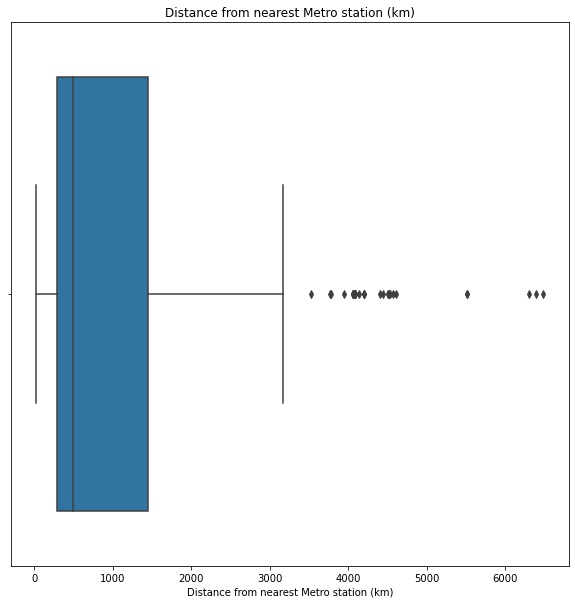

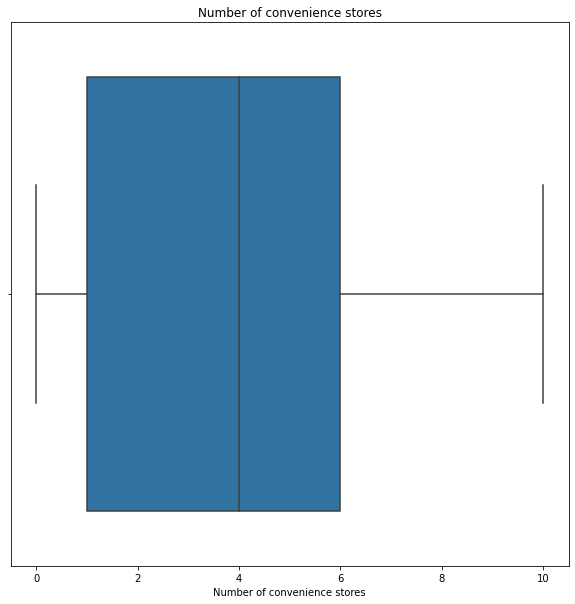

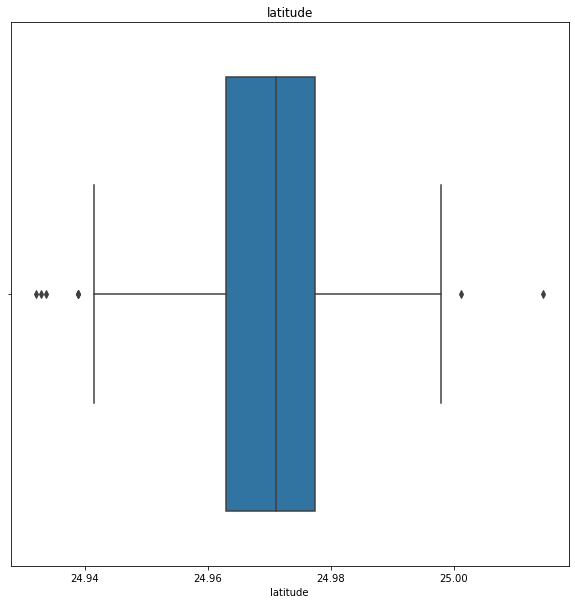

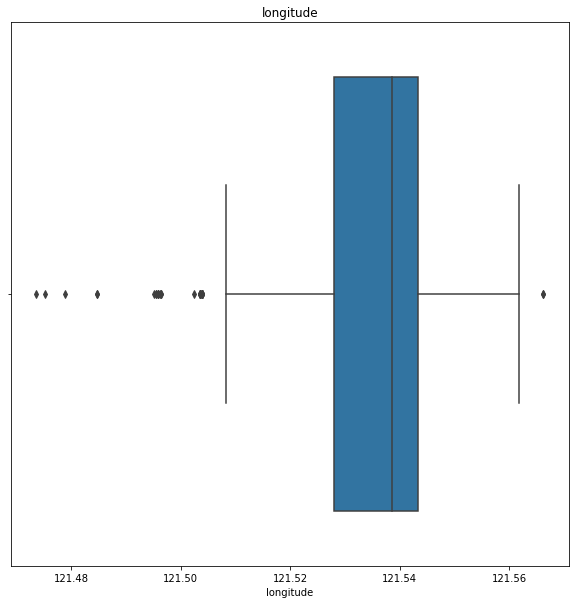

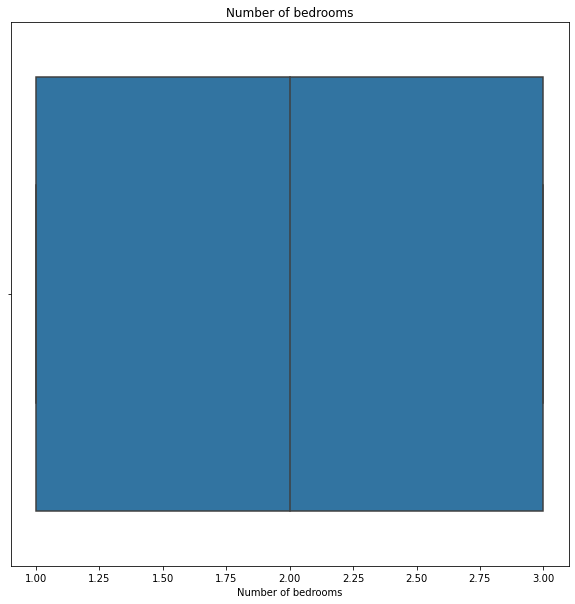

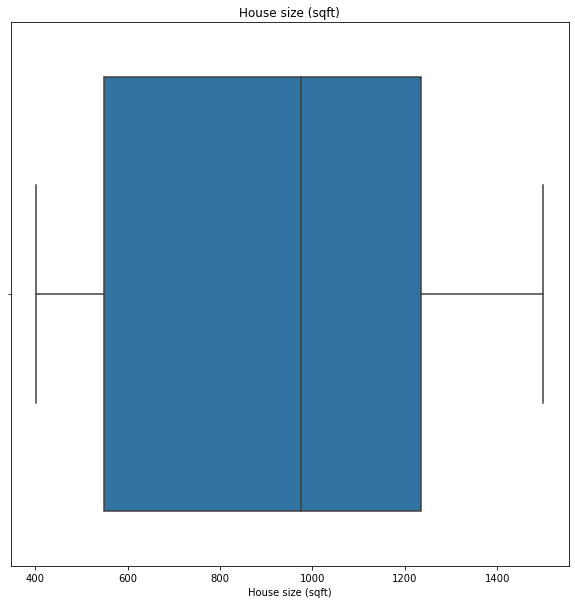

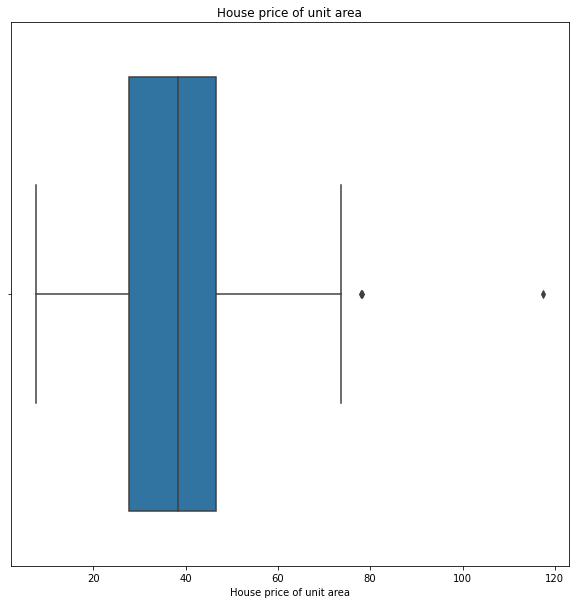

<Figure size 720x720 with 0 Axes>

In [19]:
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show

### Using interquartile range method we will remove the outliers

In [20]:
for feature in df.columns:
    IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
    ub=df[feature].quantile(0.75)+(1.5*IQR)
    lb=df[feature].quantile(0.25)-(1.5*IQR)
    df.loc[df[feature]>ub,feature]=ub
    df.loc[df[feature]<lb,feature]=lb

### Box plots after the removal of the outliers

C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\teja9\anaconda3\lib\si

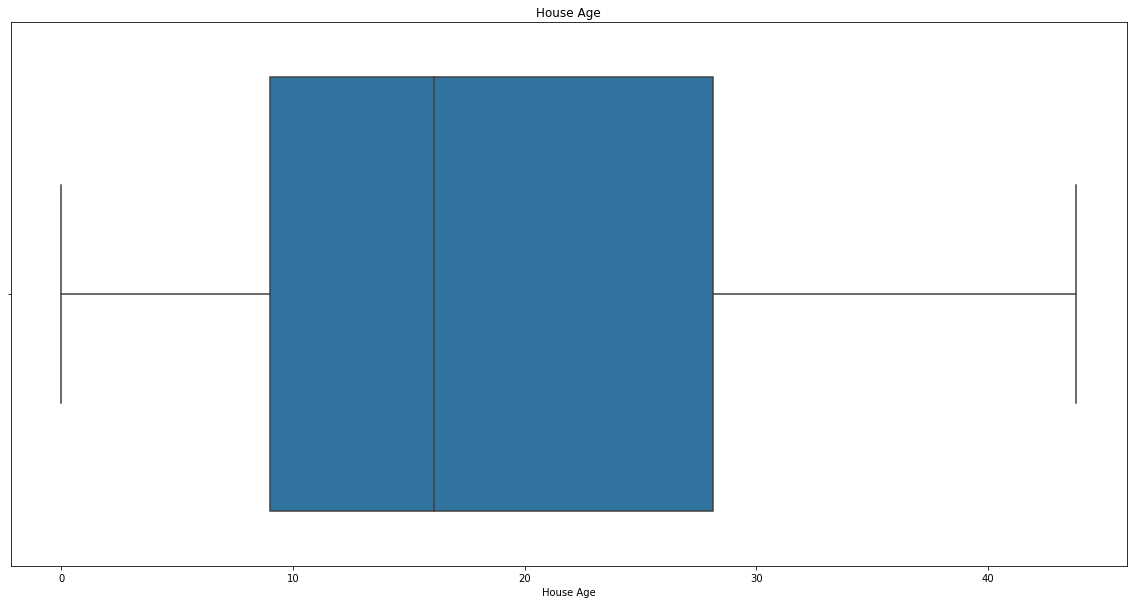

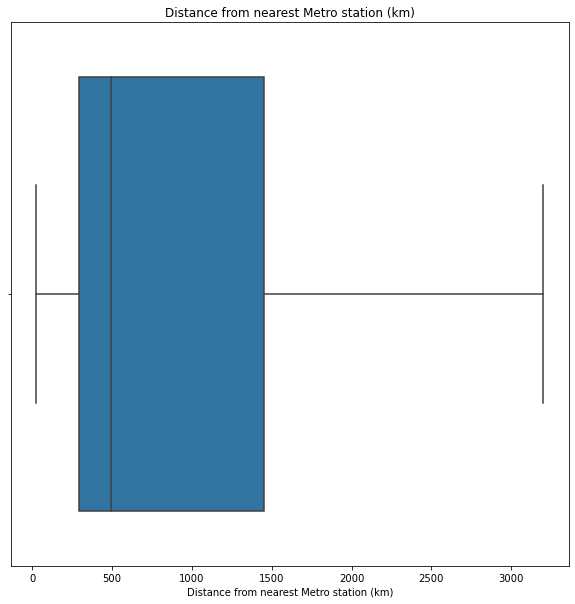

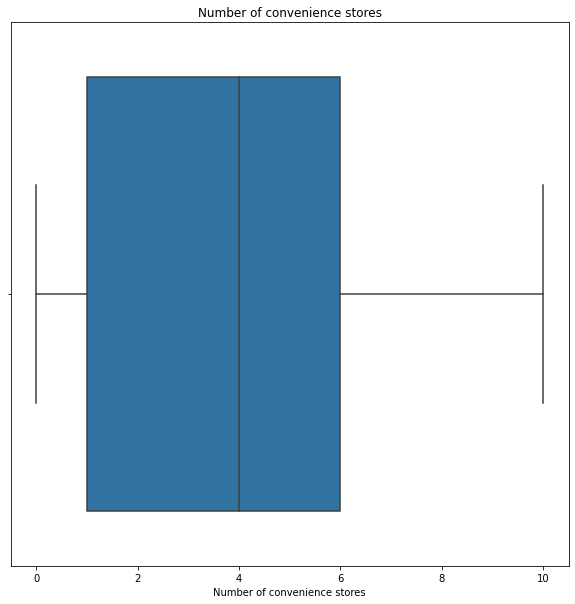

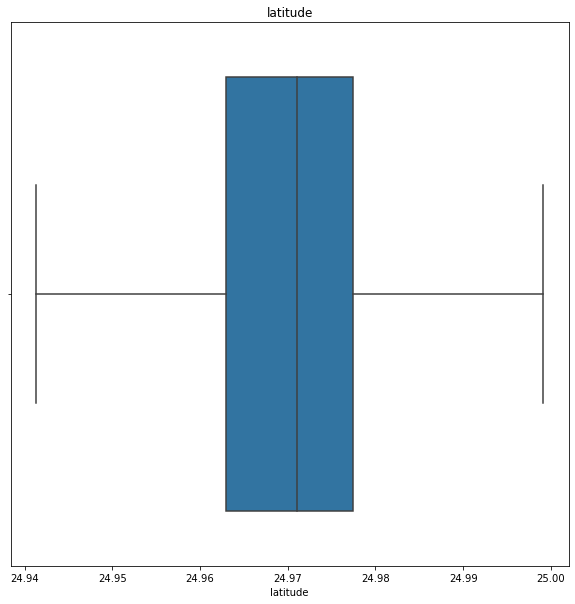

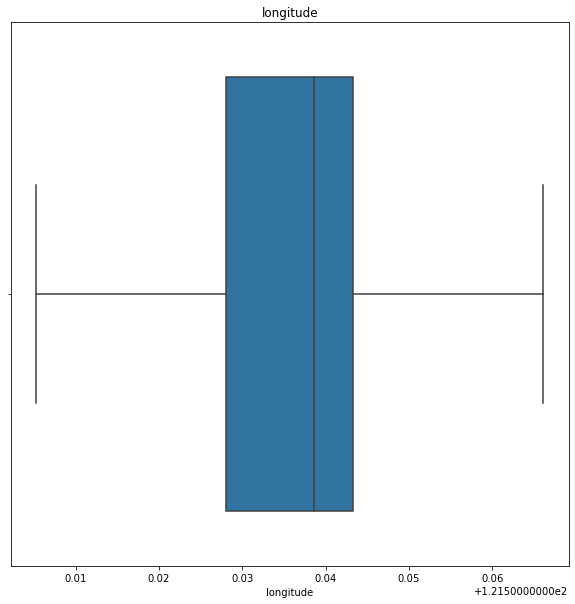

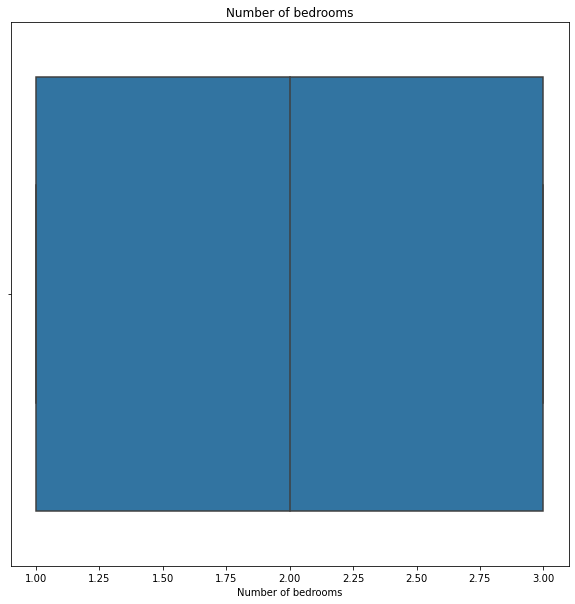

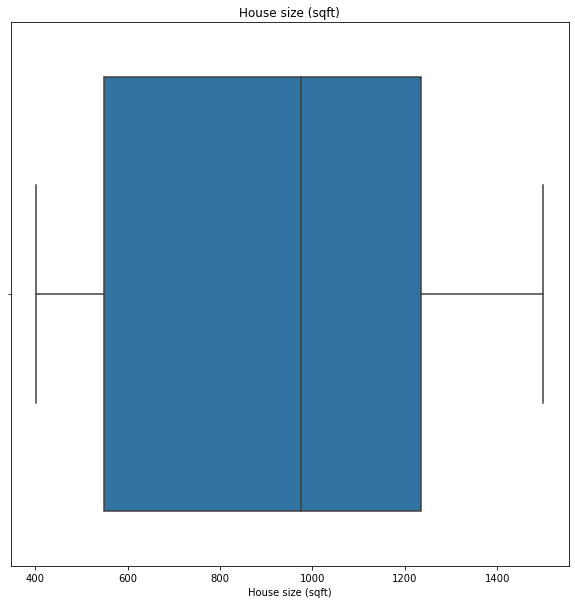

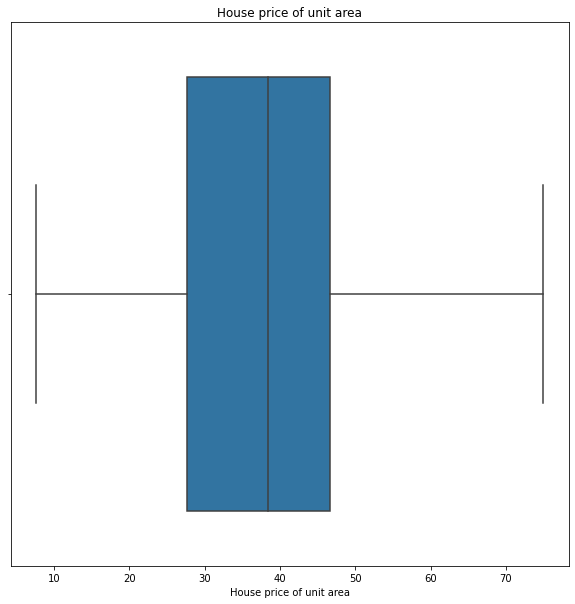

<Figure size 720x720 with 0 Axes>

In [21]:
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show

### Input features are stored in the X variable
### Target House Price is stored in the y variable

In [22]:
data=df.values
X,y=data[:,:-1],data[:,-1]

###  Data preparation for model evaluation with k-fold cross-validation
1)Define the Pipeline

2)Define the evaluation procedure

3)Evaluate the model using cross-validation

4)Report performance




In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### LinearRegression Model by removing outliers and  standardization of the dataset

In [24]:
#define the pipeline
steps=list()
steps.append(('scaler',StandardScaler()))
steps.append(('model',LinearRegression()))
pipeline=Pipeline(steps=steps)
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(pipeline,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.731 (0.826)


### ElasticNet Regressor Model  by removing outliers and  standardization of the dataset

In [25]:
#define the pipeline
steps=list()
steps.append(('scaler',StandardScaler()))
steps.append(('model',ElasticNet(alpha=1,l1_ratio=0.5)))
pipeline=Pipeline(steps=steps)
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(pipeline,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.255 (0.940)


### Support vector regressor Model by removing outliers and  standardization of the dataset

In [26]:
#define the pipeline
steps=list()
steps.append(('scaler',StandardScaler()))
steps.append(('model',SVR()))
pipeline=Pipeline(steps=steps)
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(pipeline,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.716 (0.924)


### DecisionTreeRegressor model  by removing outliers and without standardization of the dataset

In [27]:
#define model
model=DecisionTreeRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6.280 (0.930)


### RandomForestRegressor model  by removing outliers and without standardization of the dataset

In [28]:
#define model
model=RandomForestRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 4.850 (0.612)


### AdaboostRegressor model  by removing outliers and without standardization of the dataset

In [31]:
#define model
model=AdaBoostRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.668 (0.669)


### GradientboostRegressor model  by removing outliers and without standardization of the dataset

In [32]:
#define model
model=GradientBoostingRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 4.824 (0.618)


### CatBoostRegressor model  by removing outliers and without standardization of the dataset

In [33]:
#define model
model=CatBoostRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 4.983 (0.704)


### XGBoostRegressor model  by removing outliers and without standardization of the dataset

In [36]:
#define model
model=XGBRegressor()
#define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#Evaluate of model
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
#force scores to be positive
scores=np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5.341 (0.662)


### Out of all the models GradientBoostRegressor gave the best Mean Absolute Error score i.e 4.823 and the second best is RandomForestRegressor

### So now we will perform hyperparameter tuning on GradientBoostRegressor model 

### Optimal parameters(Hyperparameter tuning) for GradientBoostRegressor using GridSearchCV for Regression

In [37]:
data=df.values
X,y=data[:,:-1],data[:,-1]


In [39]:
# grid searching key hyperparameters for gradient boosting 

from sklearn.model_selection import GridSearchCV
# define the model with default hyperparameters
model = GradientBoostingRegressor()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -4.741791 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
-10.619938 (1.344898) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-10.619856 (1.344830) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-10.619777 (1.344889) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
-10.588338 (1.342735) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
-10.587887 (1.342692) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
-10.587524 (1.342936) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
-10.548834 (1.340260) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-10.548329 (1.340127) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
-10.547470 (1.340539) with: {'lea

# Final GradientBoostRegressor model for House Price Prediction

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data=df.values
X,y=data[:,:-1],data[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=GradientBoostingRegressor(learning_rate=0.01,max_depth=3,n_estimators=500,subsample=0.7)
model.fit(X_train,y_train)
yhat=model.predict(X_test)
MAE=mean_absolute_error(y_test,yhat)
MAE

4.433559718787187